In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
data = pd.read_csv("updated_cleaned_data.csv")

In [68]:
data

,Property ID,Zip code,City,Type of Property,Subtype of Property,Price (€),Construction year,Bedrooms,Living area (m²),Kitchen type,...,Elevator,Basement,Primary energy consumption (kWh/m²),CO₂ emission (kg CO₂/m²),Energy class,Heating type,Kitchen type scale,Building condition scale,Region,Price per m²
0,10583186,1341,céroux-mousty,apartment,duplex,415000,2016.0,2.0,139.0,USA hyper equipped,...,1,0,116.0,NaN,B,Gas,3.0,6.0,Walloon,2985.611511
1,10463775,1180,uccle,apartment,penthouse,1650000,2021.0,3.0,235.0,USA hyper equipped,...,1,1,62.0,9.0,B,Gas,3.0,6.0,Brussels capital region,7021.276596
2,10582739,1180,uccle,apartment,flat studio,159000,1977.0,1.0,30.0,Installed,...,1,0,316.0,NaN,F,Electric,2.0,4.0,Brussels capital region,5300.000000
3,10582752,4300,waremme,house,mansion,495000,1918.0,6.0,250.0,Installed,...,0,0,130.0,25.0,B,Gas,2.0,6.0,Walloon,1980.000000
4,10579605,1332,rixensart genval,house,villa,530000,1928.0,4.0,176.0,USA hyper equipped,...,0,1,394.0,69.0,E,Gas,3.0,4.0,Walloon,3011.363636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15141,10559545,9340,lede,house,house,548000,NaN,4.0,220.0,Hyper equipped,...,0,0,31.0,NaN,A,NaN,3.0,6.0,Flemish,2490.909091
15142,10559544,9340,lede,house,house,548000,NaN,4.0,220.0,Hyper equipped,...,0,0,30.0,NaN,A,NaN,3.0,6.0,Flemish,2490.909091
15143,10559543,8420,de haan,apartment,apartment,229000,NaN,1.0,78.0,Hyper equipped,...,0,0,326.0,NaN,D,Electric,3.0,4.0,Flemish,2935.897436
15144,10559540,1400,nivelles,apartment,apartment,170000,NaN,1.0,70.0,Installed,...,1,0,278.0,79.0,D,Electric,2.0,NaN,Walloon,2428.571429


In [69]:
data.info

<bound method DataFrame.info of        Property ID  Zip code              City Type of Property   
0         10583186      1341     céroux-mousty        apartment  \
1         10463775      1180             uccle        apartment   
2         10582739      1180             uccle        apartment   
3         10582752      4300           waremme            house   
4         10579605      1332  rixensart genval            house   
...            ...       ...               ...              ...   
15141     10559545      9340              lede            house   
15142     10559544      9340              lede            house   
15143     10559543      8420           de haan        apartment   
15144     10559540      1400          nivelles        apartment   
15145     10559539      7062             naast            house   

      Subtype of Property  Price (€)  Construction year  Bedrooms   
0                  duplex     415000             2016.0       2.0  \
1               penthouse

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15146 entries, 0 to 15145
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Property ID                          15146 non-null  int64  
 1   Zip code                             15146 non-null  int64  
 2   City                                 15146 non-null  object 
 3   Type of Property                     15146 non-null  object 
 4   Subtype of Property                  15146 non-null  object 
 5   Price (€)                            15146 non-null  int64  
 6   Construction year                    9869 non-null   float64
 7   Bedrooms                             15146 non-null  float64
 8   Living area (m²)                     15146 non-null  float64
 9   Kitchen type                         10515 non-null  object 
 10  Furnished                            15146 non-null  int64  
 11  How many fireplaces?        

In [71]:
from sklearn.model_selection import train_test_split

#X = data.drop(["Price (€)"])
X = data[['Living area (m²)','Zip code', 'How many fireplaces?', 'Terrace surface (m²)', 'Garden surface (m²)', 
          'Furnished', 'Kitchen type scale', 'Bedrooms', 'Swimming pool']]
y = data["Price (€)"]

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [73]:
train_data = X_train.join(y_train)

In [74]:
train_data

,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms,Swimming pool,Price (€)
2720,300.0,1000,0.0,0.0,20.0,0,3.0,10.0,0,825000
9589,77.0,1180,0.0,0.0,0.0,0,NaN,2.0,0,297500
4548,172.0,4820,0.0,45.0,0.0,0,NaN,4.0,0,395000
11028,135.0,1770,0.0,3.0,0.0,0,3.0,2.0,0,250000
8718,277.0,3210,0.0,0.0,0.0,0,3.0,4.0,0,894000
...,...,...,...,...,...,...,...,...,...,...
12015,77.0,9180,0.0,17.0,0.0,0,NaN,2.0,0,285600
1521,31.0,3000,0.0,0.0,0.0,1,NaN,1.0,0,332500
236,177.0,9000,0.0,0.0,0.0,0,2.0,3.0,0,415000
1945,450.0,7782,0.0,60.0,0.0,0,3.0,3.0,1,780000


array([[<Axes: title={'center': 'Living area (m²)'}>,
        <Axes: title={'center': 'Zip code'}>,
        <Axes: title={'center': 'How many fireplaces?'}>],
       [<Axes: title={'center': 'Terrace surface (m²)'}>,
        <Axes: title={'center': 'Garden surface (m²)'}>,
        <Axes: title={'center': 'Furnished'}>],
       [<Axes: title={'center': 'Kitchen type scale'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Swimming pool'}>],
       [<Axes: title={'center': 'Price (€)'}>, <Axes: >, <Axes: >]],
      dtype=object)

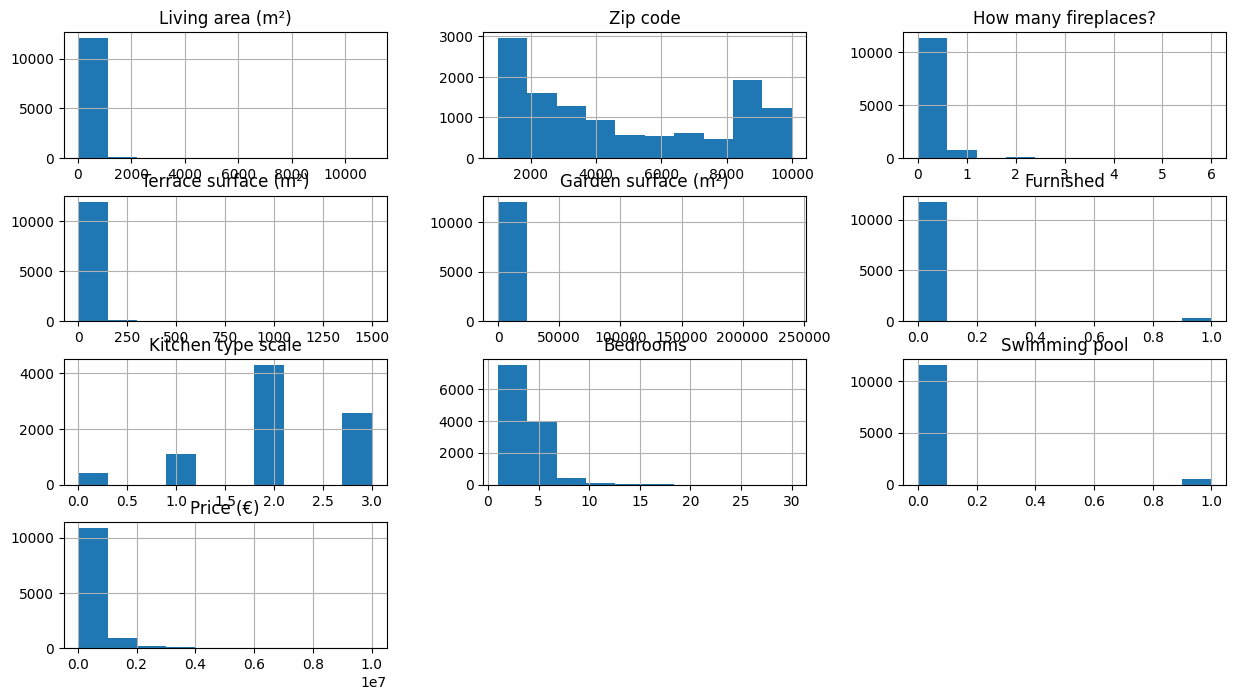

In [75]:
train_data.hist(figsize=(15, 8))

In [76]:
train_data.corr()

,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms,Swimming pool,Price (€)
Living area (m²),1.000000,-0.062771,0.146108,0.103061,0.115196,-0.011988,0.051910,0.570543,0.233626,0.510805
Zip code,-0.062771,1.000000,-0.031365,-0.090275,-0.017376,0.049074,-0.029133,-0.068967,-0.064647,-0.126930
How many fireplaces?,0.146108,-0.031365,1.000000,0.100636,0.050688,-0.009903,0.006974,0.097686,0.101624,0.117055
Terrace surface (m²),0.103061,-0.090275,0.100636,1.000000,0.053734,0.036902,0.146963,0.096043,0.130081,0.182536
Garden surface (m²),0.115196,-0.017376,0.050688,0.053734,1.000000,-0.004582,0.021934,0.103152,0.034813,0.133831
Furnished,-0.011988,0.049074,-0.009903,0.036902,-0.004582,1.000000,0.041989,0.005325,0.008875,0.026373
Kitchen type scale,0.051910,-0.029133,0.006974,0.146963,0.021934,0.041989,1.000000,-0.018294,0.142554,0.250336
Bedrooms,0.570543,-0.068967,0.097686,0.096043,0.103152,0.005325,-0.018294,1.000000,0.141595,0.415030
Swimming pool,0.233626,-0.064647,0.101624,0.130081,0.034813,0.008875,0.142554,0.141595,1.000000,0.317649
Price (€),0.510805,-0.126930,0.117055,0.182536,0.133831,0.026373,0.250336,0.415030,0.317649,1.000000


<Axes: >

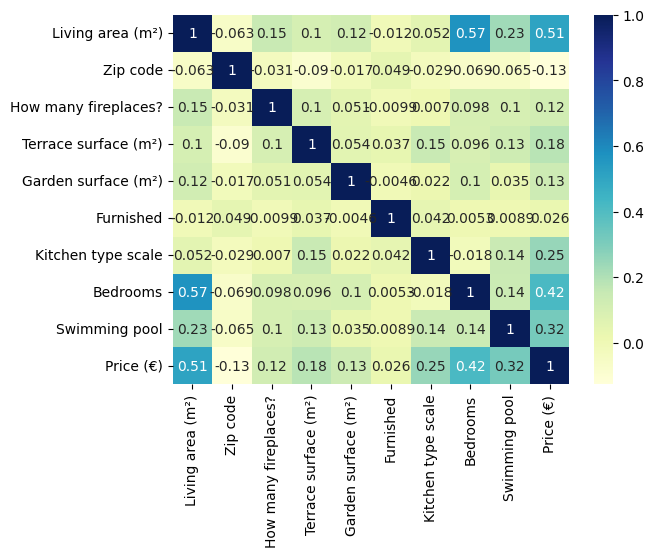

In [77]:
sns.heatmap(train_data.corr(), annot = True, cmap="YlGnBu")

In [78]:
train_data['Terrace surface (m²)'] = np.log(train_data['Terrace surface (m²)'] + 1)
train_data['Garden surface (m²)'] = np.log(train_data['Garden surface (m²)'] + 1)
train_data['Living area (m²)'] = np.log(train_data['Living area (m²)'] + 1)
train_data['How many fireplaces?'] = np.log(train_data['How many fireplaces?'] + 1)
train_data['Furnished'] = np.log(train_data['Furnished'] + 1)
train_data['Bedrooms'] = np.log(train_data['Bedrooms'] + 1)
train_data['Swimming pool'] = np.log(train_data['Swimming pool'] + 1)




array([[<Axes: title={'center': 'Living area (m²)'}>,
        <Axes: title={'center': 'Zip code'}>,
        <Axes: title={'center': 'How many fireplaces?'}>],
       [<Axes: title={'center': 'Terrace surface (m²)'}>,
        <Axes: title={'center': 'Garden surface (m²)'}>,
        <Axes: title={'center': 'Furnished'}>],
       [<Axes: title={'center': 'Kitchen type scale'}>,
        <Axes: title={'center': 'Bedrooms'}>,
        <Axes: title={'center': 'Swimming pool'}>],
       [<Axes: title={'center': 'Price (€)'}>, <Axes: >, <Axes: >]],
      dtype=object)

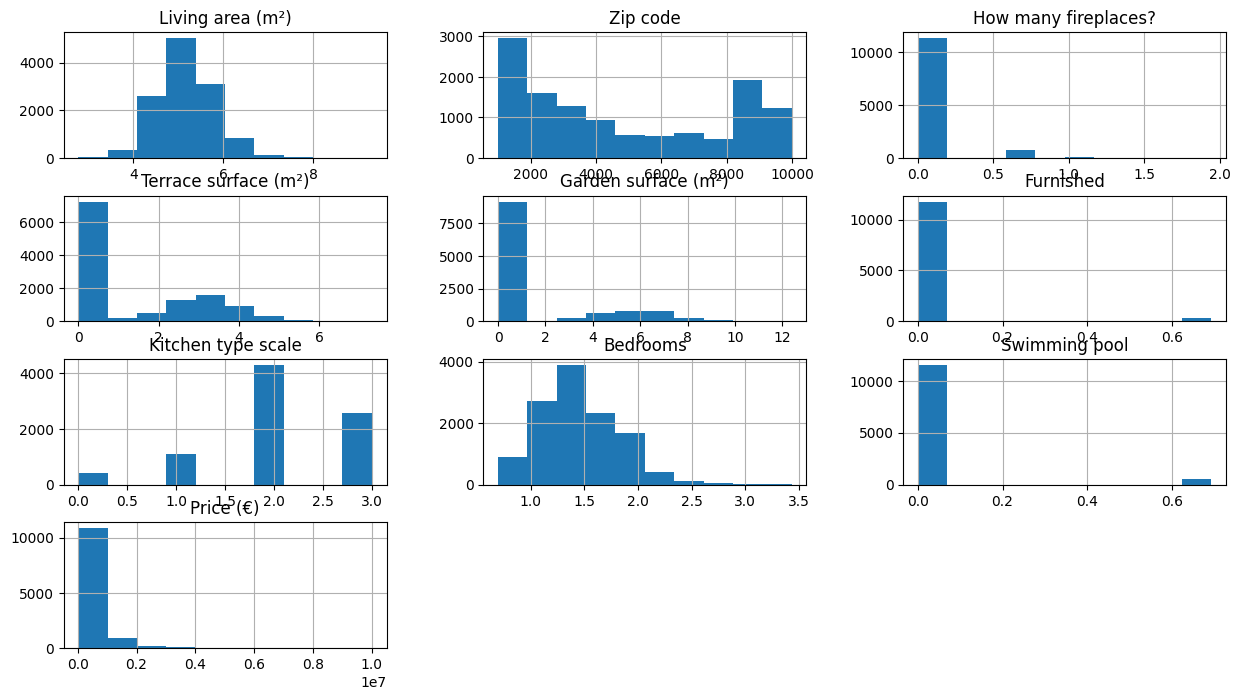

In [79]:
train_data.hist(figsize=(15, 8))

In [80]:
train_data['m2 per room'] = train_data['Living area (m²)'] / train_data['Bedrooms']

<Axes: >

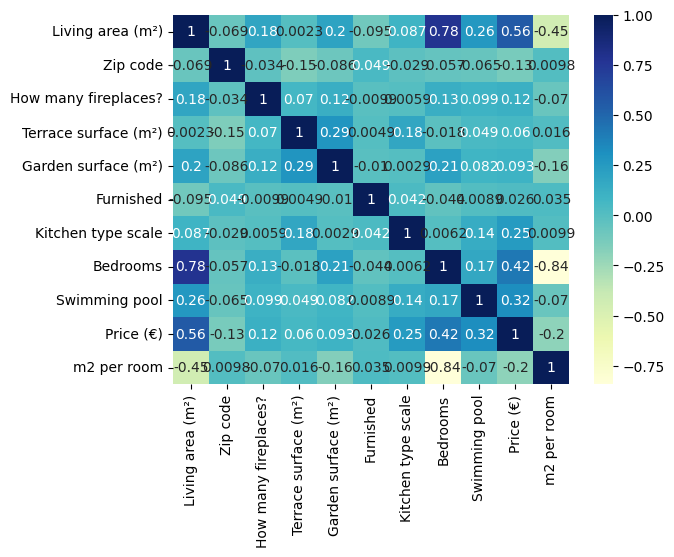

In [81]:
sns.heatmap(train_data.corr(), annot = True, cmap="YlGnBu")

In [82]:
X_train

,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms,Swimming pool
2720,300.0,1000,0.0,0.0,20.0,0,3.0,10.0,0
9589,77.0,1180,0.0,0.0,0.0,0,NaN,2.0,0
4548,172.0,4820,0.0,45.0,0.0,0,NaN,4.0,0
11028,135.0,1770,0.0,3.0,0.0,0,3.0,2.0,0
8718,277.0,3210,0.0,0.0,0.0,0,3.0,4.0,0
...,...,...,...,...,...,...,...,...,...
12015,77.0,9180,0.0,17.0,0.0,0,NaN,2.0,0
1521,31.0,3000,0.0,0.0,0.0,1,NaN,1.0,0
236,177.0,9000,0.0,0.0,0.0,0,2.0,3.0,0
1945,450.0,7782,0.0,60.0,0.0,0,3.0,3.0,1


In [83]:
X_train = train_data[['Living area (m²)','Zip code', 'How many fireplaces?', 'Terrace surface (m²)', 'Garden surface (m²)', 
          'Furnished', 'Kitchen type scale', 'Bedrooms', 'Swimming pool']]
y_train = train_data["Price (€)"]

In [84]:
X_train['Kitchen type scale'] = X_train['Kitchen type scale'].replace(np.nan, 0)
X_train['Swimming pool'] = X_train['Swimming pool'].replace(np.nan, 0)
X_train

C:\Users\Bevov\AppData\Local\Temp\ipykernel_11788\1495399910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Kitchen type scale'] = X_train['Kitchen type scale'].replace(np.nan, 0)
C:\Users\Bevov\AppData\Local\Temp\ipykernel_11788\1495399910.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Swimming pool'] = X_train['Swimming pool'].replace(np.nan, 0)


,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms,Swimming pool
2720,5.707110,1000,0.0,0.000000,3.044522,0.000000,3.0,2.397895,0.000000
9589,4.356709,1180,0.0,0.000000,0.000000,0.000000,0.0,1.098612,0.000000
4548,5.153292,4820,0.0,3.828641,0.000000,0.000000,0.0,1.609438,0.000000
11028,4.912655,1770,0.0,1.386294,0.000000,0.000000,3.0,1.098612,0.000000
8718,5.627621,3210,0.0,0.000000,0.000000,0.000000,3.0,1.609438,0.000000
...,...,...,...,...,...,...,...,...,...
12015,4.356709,9180,0.0,2.890372,0.000000,0.000000,0.0,1.098612,0.000000
1521,3.465736,3000,0.0,0.000000,0.000000,0.693147,0.0,0.693147,0.000000
236,5.181784,9000,0.0,0.000000,0.000000,0.000000,2.0,1.386294,0.000000
1945,6.111467,7782,0.0,4.110874,0.000000,0.000000,3.0,1.386294,0.693147


In [85]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

reg.fit(X_train, y_train)


LinearRegression()

In [86]:

test_data = X_test.join(y_test)

test_data['Terrace surface (m²)'] = np.log(test_data['Terrace surface (m²)'] + 1)
test_data['Garden surface (m²)'] = np.log(test_data['Garden surface (m²)'] + 1)
test_data['Living area (m²)'] = np.log(test_data['Living area (m²)'] + 1)
test_data['How many fireplaces?'] = np.log(test_data['How many fireplaces?'] + 1)
test_data['Furnished'] = np.log(test_data['Furnished'] + 1)
test_data['Bedrooms'] = np.log(test_data['Bedrooms'] + 1)
test_data['Swimming pool'] = np.log(test_data['Swimming pool'] + 1)






In [87]:
test_data['Kitchen type scale'] = X_test['Kitchen type scale'].replace(np.nan, 0)

In [88]:

test_data['Swimming pool'] = X_test['Swimming pool'].replace(np.nan, 0)
#X_test = X_test['Kitchen type scale'].replace(np.nan, 0)

In [89]:
X_test = test_data[['Living area (m²)','Zip code', 'How many fireplaces?', 'Terrace surface (m²)', 'Garden surface (m²)', 
          'Furnished', 'Kitchen type scale', 'Bedrooms', 'Swimming pool']]
y_test = test_data["Price (€)"]

In [90]:
test_data['m2 per room'] = test_data['Living area (m²)'] / test_data['Bedrooms']

From here owerride code


In [91]:
test_data

,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms,Swimming pool,Price (€),m2 per room
3630,4.753590,4530,0.000000,0.000000,0.000000,0.000000,0.0,1.386294,0,199000,3.428990
4669,6.129050,9500,0.693147,0.000000,0.000000,0.000000,2.0,1.609438,0,1350000,3.808193
4090,5.030438,9600,0.000000,0.000000,0.000000,0.000000,0.0,1.386294,0,179000,3.628694
13914,5.153292,2340,0.000000,0.000000,0.000000,0.000000,1.0,1.386294,0,319000,3.717314
9293,5.293305,6660,0.000000,2.564949,7.098376,0.000000,0.0,1.609438,0,349000,3.288915
...,...,...,...,...,...,...,...,...,...,...,...
3987,5.225747,1652,0.000000,0.000000,0.000000,0.000000,0.0,1.609438,0,460000,3.246939
3186,6.042633,1650,0.000000,0.000000,0.000000,0.000000,1.0,2.079442,0,650000,2.905892
4602,6.253829,4800,0.000000,0.000000,0.000000,0.000000,2.0,2.079442,0,550000,3.007456
12199,4.465908,2170,0.000000,0.000000,4.510860,0.000000,1.0,0.693147,0,239000,6.442943


In [92]:
reg.score(X_test, y_test)

0.34374238216535324

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler

In [94]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [95]:
X_test

,Living area (m²),Zip code,How many fireplaces?,Terrace surface (m²),Garden surface (m²),Furnished,Kitchen type scale,Bedrooms,Swimming pool
3630,4.753590,4530,0.000000,0.000000,0.000000,0.000000,0.0,1.386294,0
4669,6.129050,9500,0.693147,0.000000,0.000000,0.000000,2.0,1.609438,0
4090,5.030438,9600,0.000000,0.000000,0.000000,0.000000,0.0,1.386294,0
13914,5.153292,2340,0.000000,0.000000,0.000000,0.000000,1.0,1.386294,0
9293,5.293305,6660,0.000000,2.564949,7.098376,0.000000,0.0,1.609438,0
...,...,...,...,...,...,...,...,...,...
3987,5.225747,1652,0.000000,0.000000,0.000000,0.000000,0.0,1.609438,0
3186,6.042633,1650,0.000000,0.000000,0.000000,0.000000,1.0,2.079442,0
4602,6.253829,4800,0.000000,0.000000,0.000000,0.000000,2.0,2.079442,0
12199,4.465908,2170,0.000000,0.000000,4.510860,0.000000,1.0,0.693147,0


In [100]:
forest.score(X_test, y_test)

0.6542940368767929

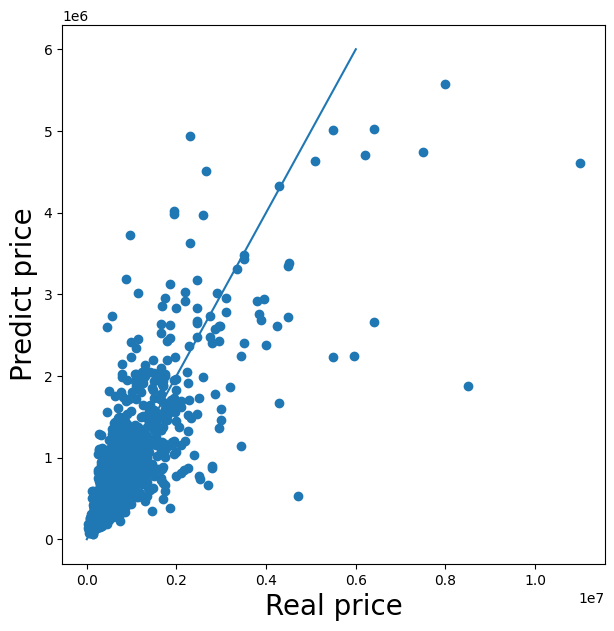

In [99]:
y_pred = forest.predict(X_test)
plt.figure(figsize=(7, 7))
plt.scatter(y_test, y_pred)
# plt.scatter(test_values, test_predictions_linear) # рисуем точки, соответствущие парам настоящее значение - прогноз
plt.plot([0, 6 * 10**6], [0, 6 * 10**6]) # рисуем прямую, на которой предсказания и настоящие значения совпадают
plt.xlabel('Real price', fontsize=20)
plt.ylabel('Predict price', fontsize=20);